# Eager Execution in Tensorflow 2.0

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf

## Tensor Operations

In [2]:
tf.add(1, 2)

<tf.Tensor: id=2, shape=(), dtype=int32, numpy=3>

In [3]:
tf.add([1, 2], [3, 4])

<tf.Tensor: id=6, shape=(2,), dtype=int32, numpy=array([4, 6], dtype=int32)>

In [4]:
tf.square(5)

<tf.Tensor: id=9, shape=(), dtype=int32, numpy=25>

In [5]:
tf.reduce_sum([1, 2, 3])

<tf.Tensor: id=17, shape=(), dtype=int32, numpy=6>

In [6]:
tf.square(2) + tf.square(3)

<tf.Tensor: id=23, shape=(), dtype=int32, numpy=13>

In [7]:
x = tf.matmul([[1]], [[2, 3]])

In [8]:
x.shape

TensorShape([1, 2])

In [9]:
x.dtype

tf.int32

In [10]:
x.numpy()

array([[2, 3]], dtype=int32)

## Custom Layers

In [195]:
class MyDenseLayer(tf.keras.layers.Layer):
    def __init__(self, num_outputs):
        super(MyDenseLayer, self).__init__()
        self.num_outputs = num_outputs
    
    def build(self, input_shape):
        self.kernel = self.add_weight("kernel", 
                                      shape=[int(input_shape[-1]), 
                                             self.num_outputs],
                                      initializer='normal')
    
        self.bias = self.add_weight("bias", 
                                    shape=[self.num_outputs,],
                                    initializer='normal')

    def call(self, inputs):
        return tf.matmul(inputs, self.kernel) + self.bias

In [170]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation

In [216]:
model = Sequential([
    MyDenseLayer(20),
    Activation('relu'),
    MyDenseLayer(3),
])

In [217]:
model.build(input_shape=(None, 4))

In [218]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_dense_layer_18 (MyDenseLa multiple                  100       
_________________________________________________________________
activation_9 (Activation)    multiple                  0         
_________________________________________________________________
my_dense_layer_19 (MyDenseLa multiple                  63        
Total params: 163
Trainable params: 163
Non-trainable params: 0
_________________________________________________________________


In [219]:
X = tf.random.normal([7, 4])

In [220]:
X

<tf.Tensor: id=557588, shape=(7, 4), dtype=float32, numpy=
array([[ 1.0537682 , -0.08793408,  0.43695107,  0.07237347],
       [ 0.31680015, -1.4092643 , -0.7347491 , -1.4623705 ],
       [ 0.6114108 ,  0.14567526,  0.7957922 , -1.827938  ],
       [ 1.0117613 , -0.9442826 ,  0.48324358,  0.7250189 ],
       [-0.8699025 , -0.63343525, -1.7522963 ,  1.0099247 ],
       [ 0.07518003, -0.30341572,  0.7334618 ,  0.7577722 ],
       [ 0.25641388, -0.20596339,  0.45244467,  1.4912127 ]],
      dtype=float32)>

### Model works like a function:

In [221]:
model(X)

<tf.Tensor: id=557598, shape=(7, 3), dtype=float32, numpy=
array([[ 5.3942591e-02,  5.9121303e-02, -2.4688920e-02],
       [ 3.1958692e-02,  6.0313798e-02, -1.9343466e-02],
       [ 1.0793198e-02,  8.4620416e-02, -5.3711191e-02],
       [ 5.2066226e-02,  5.8384191e-02, -1.0886148e-02],
       [ 4.7191717e-02,  5.1462334e-02,  1.7925408e-03],
       [ 4.4696957e-02,  6.0007419e-02, -1.2955684e-03],
       [ 5.1862624e-02,  5.5538509e-02,  4.0862709e-05]], dtype=float32)>

In [222]:
df = pd.read_csv('../data/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [223]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values.astype('float32')
y = df['species'].map({"setosa": 0, "versicolor": 1, "virginica": 2}).values.astype('int32')

### Datasets

In [224]:
dataset = tf.data.Dataset.from_tensor_slices((X, y))
dataset = dataset.shuffle(1000).repeat().batch(16)

## One batch:

In [225]:
dataset.take(1)
for data, labels in dataset.take(1):
    print(data)
    print(labels)
    print("Logits: ", model(data))

tf.Tensor(
[[6.7 3.3 5.7 2.1]
 [6.3 2.3 4.4 1.3]
 [6.4 2.9 4.3 1.3]
 [6.2 2.8 4.8 1.8]
 [6.2 3.4 5.4 2.3]
 [5.7 2.5 5.  2. ]
 [6.1 3.  4.6 1.4]
 [5.5 3.5 1.3 0.2]
 [4.8 3.1 1.6 0.2]
 [4.6 3.6 1.  0.2]
 [5.1 2.5 3.  1.1]
 [6.  2.2 5.  1.5]
 [4.9 2.5 4.5 1.7]
 [6.3 3.4 5.6 2.4]
 [5.1 3.5 1.4 0.3]
 [6.5 3.  5.5 1.8]], shape=(16, 4), dtype=float32)
tf.Tensor([2 1 1 2 2 2 1 0 0 0 1 2 2 2 0 2], shape=(16,), dtype=int32)
Logits:  tf.Tensor(
[[ 0.00348466  0.07851625 -0.10721572]
 [ 0.0220822   0.07577375 -0.10652293]
 [ 0.02371168  0.0787189  -0.10717645]
 [ 0.0173      0.0757914  -0.10057374]
 [ 0.00876131  0.07669704 -0.09690564]
 [ 0.01167361  0.0731988  -0.09251665]
 [ 0.0157009   0.07894739 -0.10352787]
 [ 0.0544504   0.08094069 -0.08436342]
 [ 0.04959407  0.07942908 -0.0823838 ]
 [ 0.05360587  0.07944155 -0.07470743]
 [ 0.0399408   0.07516129 -0.0866328 ]
 [ 0.00740556  0.07567847 -0.10241728]
 [ 0.01275474  0.07376041 -0.0837929 ]
 [ 0.00640018  0.0764465  -0.09788273]
 [ 0.05432378  0

## Optimizer and Loss

In [226]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [227]:
optimizer = Adam()
loss = SparseCategoricalCrossentropy(from_logits=True)

In [228]:
logits = model(data)
logits

<tf.Tensor: id=557643, shape=(16, 3), dtype=float32, numpy=
array([[ 0.00348466,  0.07851625, -0.10721572],
       [ 0.0220822 ,  0.07577375, -0.10652293],
       [ 0.02371168,  0.0787189 , -0.10717645],
       [ 0.0173    ,  0.0757914 , -0.10057374],
       [ 0.00876131,  0.07669704, -0.09690564],
       [ 0.01167361,  0.0731988 , -0.09251665],
       [ 0.0157009 ,  0.07894739, -0.10352787],
       [ 0.0544504 ,  0.08094069, -0.08436342],
       [ 0.04959407,  0.07942908, -0.0823838 ],
       [ 0.05360587,  0.07944155, -0.07470743],
       [ 0.0399408 ,  0.07516129, -0.0866328 ],
       [ 0.00740556,  0.07567847, -0.10241728],
       [ 0.01275474,  0.07376041, -0.0837929 ],
       [ 0.00640018,  0.0764465 , -0.09788273],
       [ 0.05432378,  0.07961078, -0.08218825],
       [ 0.00270888,  0.07875527, -0.10740018]], dtype=float32)>

In [229]:
loss(labels, logits).numpy()

1.1201406

## Gradients

In [230]:
def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        logits = model(data, training=True)
        loss_value = loss(labels, logits)
    return tape.gradient(loss_value, model.variables)

grad(model, data, labels)

[<tf.Tensor: id=557763, shape=(4, 20), dtype=float32, numpy=
 array([[ 0.        ,  0.        ,  0.0675901 ,  0.00927857,  0.08708616,
         -0.03434665,  0.04728064,  0.03890901,  0.05362267, -0.0829242 ,
          0.00925594, -0.06678808,  0.16582729,  0.01354121,  0.00148034,
          0.        ,  0.        , -0.21995744,  0.        ,  0.0004162 ],
        [ 0.        ,  0.        ,  0.04515456,  0.00386843,  0.05599882,
         -0.01517142,  0.0332395 ,  0.00046434,  0.02054331, -0.02866804,
         -0.01117873, -0.03143419,  0.07597946,  0.0048316 , -0.01948488,
          0.        ,  0.        , -0.10450009,  0.        ,  0.01345415],
        [ 0.        ,  0.        ,  0.04831098,  0.00458828,  0.06560149,
         -0.02924332,  0.01076654,  0.06709859,  0.06184249, -0.10040776,
          0.03333506, -0.06730536,  0.17208798,  0.01616504,  0.03256578,
          0.        ,  0.        , -0.18666606,  0.        , -0.01997952],
        [ 0.        ,  0.        ,  0.0201373 , 

In [231]:
gw1, gb1, gw2, gb2  = grad(model, data, labels)

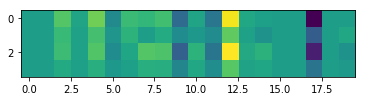

In [232]:
plt.imshow(gw1);

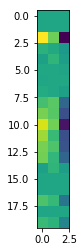

In [233]:
plt.imshow(gw2);

## Training Loop

In [234]:
loss_history = []
accuracy_history = []
acc = tf.keras.metrics.SparseCategoricalAccuracy()

for (i, (data, labels)) in enumerate(dataset.take(400)):
    with tf.GradientTape() as tape:
        logits = model(data, training=True)
        loss_value = loss(labels, logits)

    loss_history.append(loss_value.numpy())
    
    grads = tape.gradient(loss_value, model.trainable_variables)
    
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
        
    acc.update_state(labels, logits)
    accuracy = acc.result().numpy()
    accuracy_history.append(accuracy)
    
    if i % 20 == 0:
        print(i, loss_value.numpy(), accuracy)

0 1.1201406 0.25
20 1.0627466 0.33333334
40 1.0497134 0.37042683
60 1.0085756 0.4170082
80 0.92006564 0.48070988
100 0.8619537 0.5179455
120 0.82986516 0.5418388
140 0.84869856 0.56028366
160 0.6609833 0.574146
180 0.58062565 0.5835635
200 0.5974463 0.5942164
220 0.64798146 0.6043552
240 0.4732931 0.6159232
260 0.46167126 0.6329023
280 0.55009115 0.64590746
300 0.48333395 0.6613372
320 0.41116196 0.6775701
340 0.38423276 0.6922654
360 0.40117788 0.70671743
380 0.37189448 0.7194882


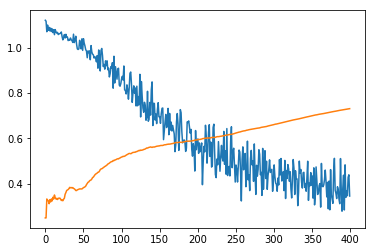

In [235]:
plt.plot(loss_history)
plt.plot(accuracy_history)